# Explanatory Data Analysis (Olympic Games)

# Questions:
* ### What are TOP 10 Countries in Olympic Games?
* ### Are there typical Summer/Winter Games Countries?
* ### Do GDP, Population and Politics affect athlete success?
* ### Are there countries with more successful women athletes?  

## Data Import and Inspection

* Summer (__summer.csv__) --> Dataset with Medals earned in Summer Olympic Games
* Winter (__winter.csv__) --> Dataset with Medals earned in Winter Olympic Games
* dicto (__dictionary.csv__) -> Dataset with basic information about countries.

In [396]:
import pandas as pd
import numpy as np

In [397]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dicto = pd.read_csv("dictionary.csv")

In [398]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [399]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [400]:
dicto.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [401]:
dicto.isna().sum(axis= 0)

Country            0
Code               0
Population         5
GDP per Capita    25
dtype: int64

## Merging and Concatenating

In [402]:
summer["Edition"] = "Summer"
winter["Edition"] = "Winter"

In [403]:
olympic = pd.concat([summer,winter])

In [404]:
olympic.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Edition
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer


In [405]:
dicto.rename(columns = {"Code": "Code_dicto"}, inplace= True)
olympic.rename(columns = {"Country": "Code"}, inplace= True)

In [406]:
dicto.columns

Index(['Country', 'Code_dicto', 'Population', 'GDP per Capita'], dtype='object')

In [407]:
olympic = olympic.merge(dicto.loc[:, ['Country', 'Code_dicto']], how= "left", left_on= "Code", right_on= "Code_dicto")

In [408]:
olympic.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country,Code_dicto
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary,HUN
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria,AUT
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece,GRE
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece,GRE
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece,GRE


In [409]:
olympic.drop(columns="Code_dicto", inplace= True)

## Data Cleaning (Part 1)

 For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics.  __Filling__ missing values.

In [410]:
olympic.columns = olympic.columns.str.strip()
dicto.rename(columns= {"GDP per Capita": "GDP"}, inplace= True)

In [411]:
olympic.isna().sum(axis =0)

Year             0
City             0
Sport            0
Discipline       0
Athlete          0
Code             4
Gender           0
Event            0
Medal            0
Edition          0
Country       6367
dtype: int64

In [412]:
olympic.loc[olympic.Code.isna()].index

Int64Index([29603, 31072, 31091, 31110], dtype='int64')

In [413]:
olympic.drop(index = olympic.loc[olympic.Code.isna()].index, inplace= True)

In [414]:
olympic.reset_index()

,index,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
0,0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary
1,1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria
2,2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece
3,3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece
4,4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter,United Kingdom
36927,36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter,United States
36928,36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter,Canada
36929,36933,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter,Czech Republic


In [415]:
olympic.isna().sum(axis =0)

Year             0
City             0
Sport            0
Discipline       0
Athlete          0
Code             0
Gender           0
Event            0
Medal            0
Edition          0
Country       6363
dtype: int64

In [416]:
olympic.loc[olympic.isna().any(axis=1)].head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
132,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Summer,NaN
133,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Summer,NaN
134,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Summer,NaN
135,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Summer,NaN
136,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Summer,NaN


In [417]:
countries_dicto = {'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}

In [418]:
missing_countries = pd.Series(data= list(countries_dicto.values()), index=list(countries_dicto.keys()))
missing_countries

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
dtype: object

In [419]:
olympic.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Code', 'Gender',
       'Event', 'Medal', 'Edition', 'Country'],
      dtype='object')

In [420]:
olympic.Country.isnull().value_counts()

False    30568
True      6363
Name: Country, dtype: int64

In [421]:
olympic.Code.map(missing_countries)#.value_counts()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
36930    NaN
36931    NaN
36932    NaN
36933    NaN
36934    NaN
Name: Code, Length: 36931, dtype: object

In [422]:
olympic.Country.fillna(olympic.Code.map(missing_countries), inplace = True)

In [423]:
olympic.isna().sum(axis =0)

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Code          0
Gender        0
Event         0
Medal         0
Edition       0
Country       0
dtype: int64

## Data Cleaning (Part 2)


* Converting column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [424]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        36931 non-null  int64 
 1   City        36931 non-null  object
 2   Sport       36931 non-null  object
 3   Discipline  36931 non-null  object
 4   Athlete     36931 non-null  object
 5   Code        36931 non-null  object
 6   Gender      36931 non-null  object
 7   Event       36931 non-null  object
 8   Medal       36931 non-null  object
 9   Edition     36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [425]:
olympic.Medal = olympic.Medal.astype("category")

In [426]:
olympic.Medal = olympic.Medal.cat.set_categories(["Bronze" , "Silver" , "Gold"], ordered= True)

In [427]:
olympic.Medal

0          Gold
1        Silver
2        Bronze
3          Gold
4        Silver
          ...  
36930    Bronze
36931      Gold
36932    Silver
36933      Gold
36934    Bronze
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

# Question 1
*  ### What are TOP 10 Countries in Olympic Games?


In [428]:
import seaborn as sns
import matplotlib.pyplot as plt

In [429]:
olympic.groupby("Country").Medal.count().sort_values(ascending= False)[0:10]

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Medal, dtype: int64

In [430]:
top_10_countries = list(olympic.groupby("Country").Medal.count().sort_values(ascending= False)[0:10].keys())
top_10_countries

['United States',
 'Soviet Union',
 'United Kingdom',
 'Germany',
 'France',
 'Italy',
 'Sweden',
 'Canada',
 'Australia',
 'Hungary']

In [431]:
olympic_top_10 = olympic.loc[olympic.Country.isin(top_10_countries)]
olympic_top_10

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Summer,Hungary
11,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,Summer,United States
12,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Summer,Hungary
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,Summer,United States
...,...,...,...,...,...,...,...,...,...,...,...
36928,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Winter,Germany
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter,United Kingdom
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter,United States
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter,Canada


In [432]:
plt.rcdefaults()

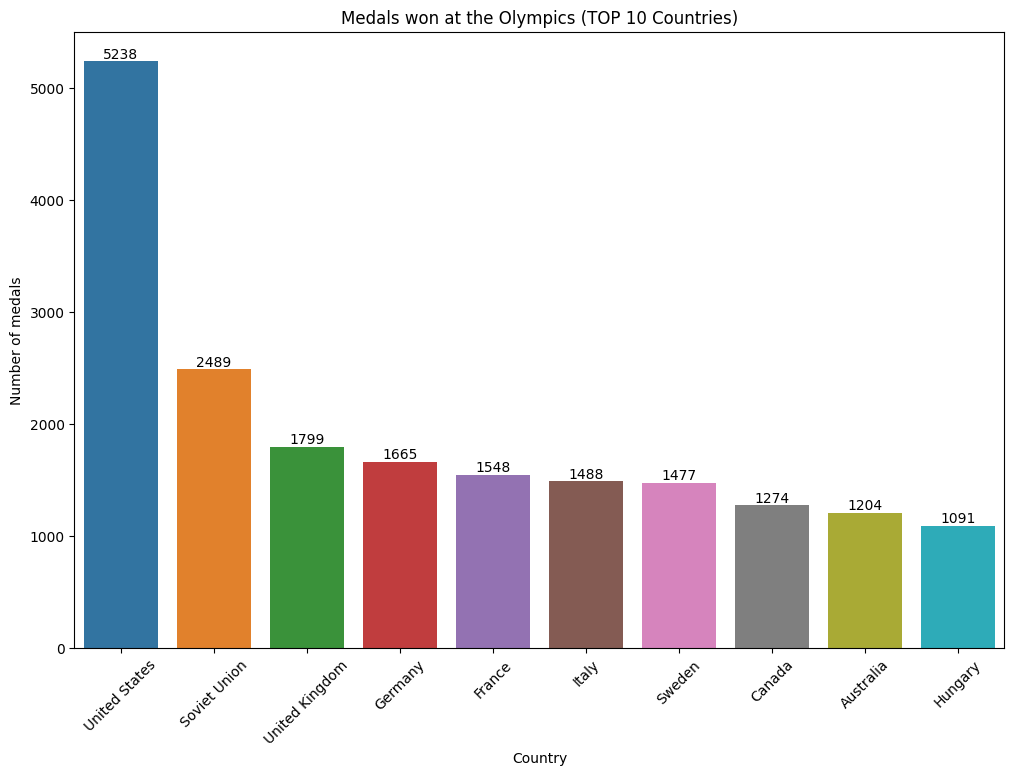

In [433]:
plt.figure(figsize= (12, 8))
sns.countplot(data= olympic_top_10, x= "Country", order= top_10_countries)
plt.xticks(rotation=45)
# Add labels over bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height().astype("int")}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title("Medals won at the Olympics (TOP 10 Countries)")
plt.ylabel("Number of medals")
plt.show()

# Question 2.
* ### Are there typical Summer/Winter Games Countries?

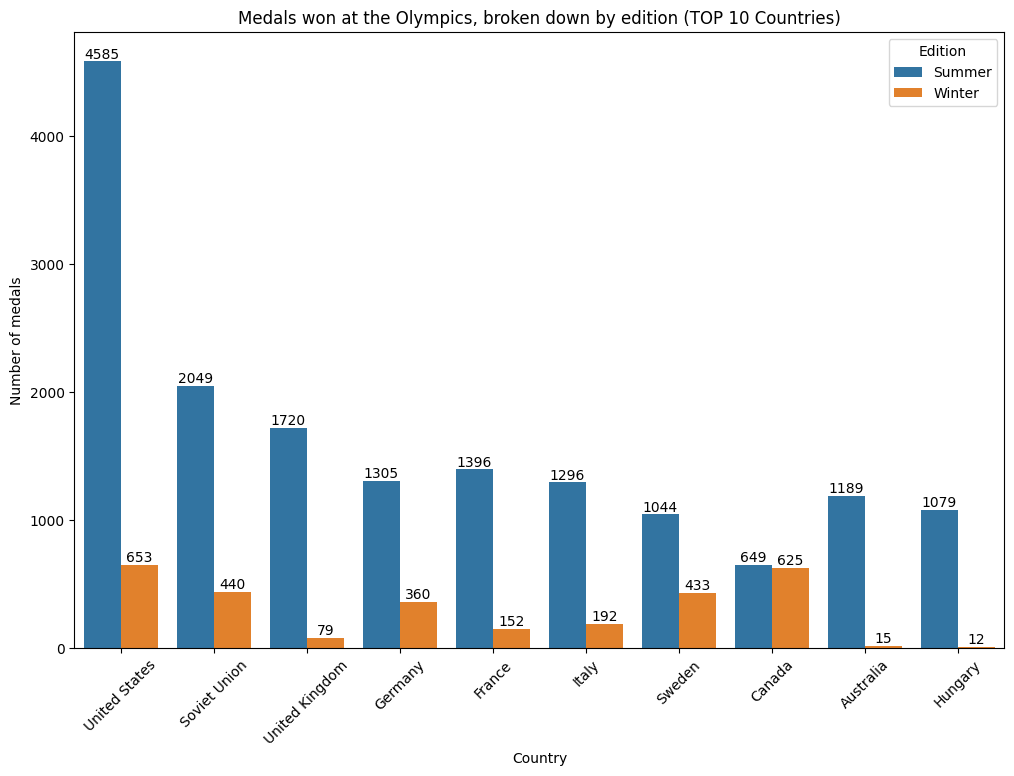

In [434]:
plt.figure(figsize= (12, 8))
sns.countplot(data= olympic_top_10, x= "Country", hue= "Edition", order= top_10_countries)
plt.xticks(rotation=45)
# Add labels over bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height().astype("int")}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title("Medals won at the Olympics, broken down by edition (TOP 10 Countries)")
plt.ylabel("Number of medals")
plt.show()

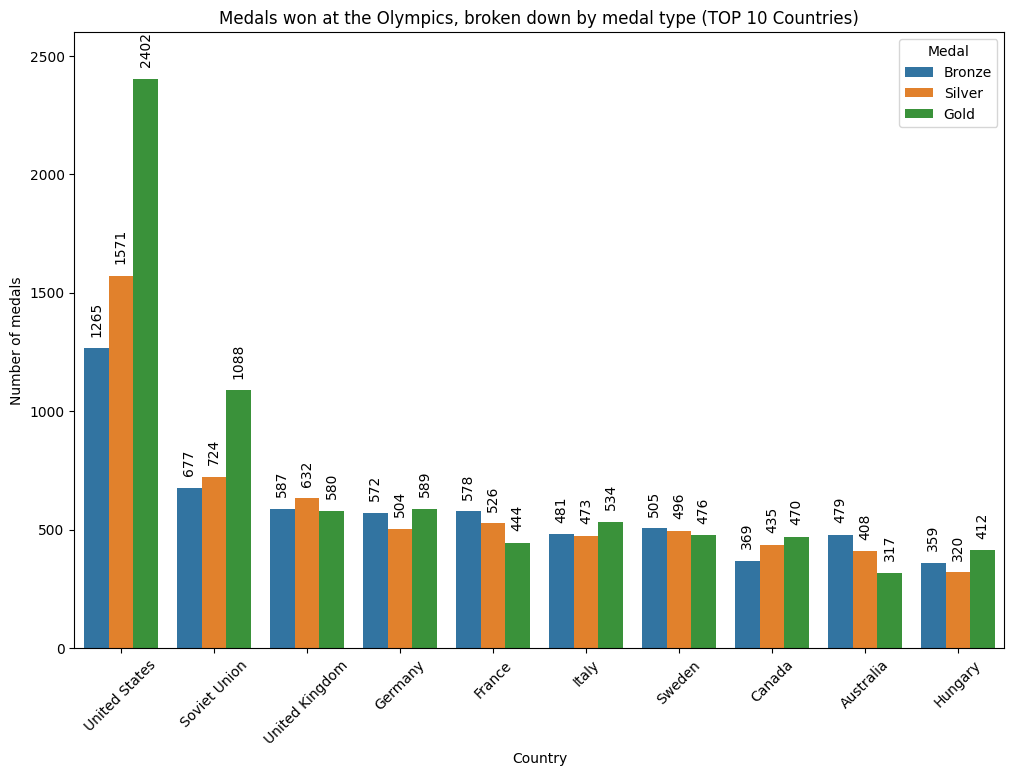

In [435]:
plt.figure(figsize= (12, 8))
sns.countplot(data= olympic_top_10, x= "Country", hue= "Medal", order= top_10_countries)
plt.xticks(rotation=45)


# Add labels over bars
ax = plt.gca()
rotation_angle = 90
font_size = 10
for p in ax.patches:
    ax.annotate(f'{p.get_height().astype("int")}', (p.get_x() + p.get_width() / 2, p.get_height()+50), ha='center', va='bottom', rotation=rotation_angle, fontsize=font_size)

first_bar_height  = ax.patches[1].get_height()

plt.title("Medals won at the Olympics, broken down by medal type (TOP 10 Countries)")
plt.ylabel("Number of medals")
plt.ylim(0, 2600)
plt.show()

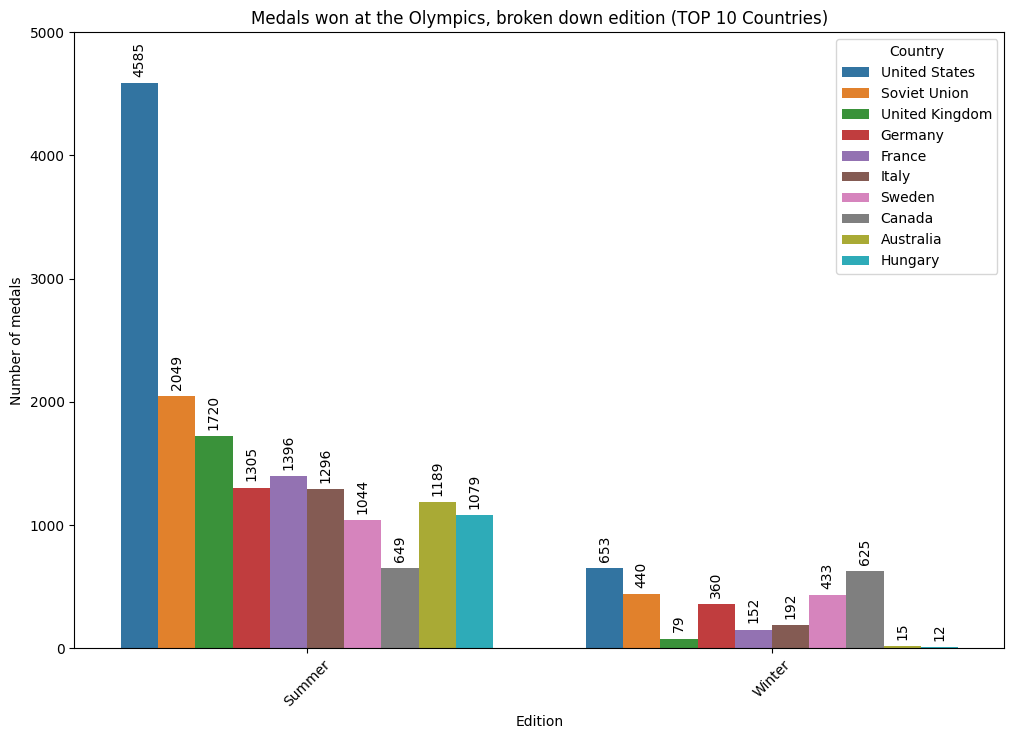

In [436]:
plt.figure(figsize= (12, 8))
sns.countplot(data= olympic_top_10, x= "Edition", hue = "Country", hue_order= top_10_countries)
plt.xticks(rotation=45)

# Add labels over bars
ax = plt.gca()
rotation_angle = 90
font_size = 10
for p in ax.patches:
    ax.annotate(f'{p.get_height().astype("int")}', (p.get_x() + p.get_width() / 2, p.get_height()+50), ha='center', va='bottom', rotation=rotation_angle, fontsize=font_size)

plt.title("Medals won at the Olympics, broken down by edition (TOP 10 Countries)")
plt.ylabel("Number of medals")
plt.ylim(0, 5000)
plt.show()

# Question 3.
* ### Do GDP, Population and Politics affect athlete success?

## Data preparation

In [437]:
top_50_countries = list(olympic.groupby("Country").Medal.count().sort_values(ascending= False)[0:50].keys())


In [438]:
olympic_top_50 = olympic.loc[olympic.Country.isin(top_50_countries)]

In [439]:
olympic_top_50.groupby(["Country"]).Medal.count().sort_values(ascending= False)

Country
United States              5238
Soviet Union               2489
United Kingdom             1799
Germany                    1665
France                     1548
Italy                      1488
Sweden                     1477
Canada                     1274
Australia                  1204
Hungary                    1091
Russia                     1031
Norway                     1011
East Germany                987
Netherlands                 973
Finland                     890
China                       889
Japan                       851
Switzerland                 665
Romania                     642
Korea, South                616
West Germany                584
Poland                      538
Denmark                     512
Czechoslovakia              487
Spain                       444
Yugoslavia                  442
Brazil                      431
Austria                     426
Belgium                     424
Cuba                        410
Bulgaria                    339


In [440]:
olympic_top_50_medals = olympic_top_50.groupby(["Country", "Medal"]).Medal.count().unstack(fill_value= 0)[["Gold", "Silver", "Bronze"]].sort_values(["Gold", "Silver", "Bronze"], ascending= False)
olympic_top_50_medals.head()

Medal,Gold,Silver,Bronze
Country,,,
United States,2402,1571,1265
Soviet Union,1088,724,677
Germany,589,504,572
United Kingdom,580,632,587
Italy,534,473,481


In [441]:
olympic_top_50_medals.insert(0, "Total", olympic_top_50_medals.sum(axis=1)) 

In [442]:
olympic_top_50_medals.head()

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
Germany,1665,589,504,572
United Kingdom,1799,580,632,587
Italy,1488,534,473,481


In [443]:
dicto

,Country,Code_dicto,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [444]:
dicto.set_index("Country", inplace= True)

In [445]:
dicto.rename(columns= {"GDP per Capita": "GDP"}, inplace= True)

In [446]:
dicto.loc[:, ["Population", "GDP"]]

,Population,GDP
Country,,
Afghanistan,32526562.0,594.323081
Albania,2889167.0,3945.217582
Algeria,39666519.0,4206.031232
American Samoa*,55538.0,NaN
Andorra,70473.0,NaN
...,...,...
Vietnam,91703800.0,2111.138024
Virgin Islands*,103574.0,NaN
Yemen,26832215.0,1406.291651


In [447]:
olympic_top_50_medals = olympic_top_50_medals.join(dicto.loc[:, ["Population", "GDP"]])

In [448]:
olympic_top_50_medals.head()

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
Germany,1665,589,504,572,81413145.0,41313.313995
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Italy,1488,534,473,481,60802085.0,29957.804315


In [449]:
olympic_top_50.loc[:, ["Year", "Edition", "Country"]].drop_duplicates().groupby("Country").Year.count().sort_values()

Country
Unified Team                2
Unified Team of Germany     6
Uruguay                     8
Nigeria                     8
Ukraine                     9
Pakistan                    9
Croatia                    10
Czech Republic             10
Belarus                    11
Kenya                      11
Russia                     11
East Germany               11
West Germany               12
Cuba                       14
Jamaica                    14
Iran                       15
China                      15
Turkey                     16
India                      17
South Africa               17
Soviet Union               18
Argentina                  18
Yugoslavia                 18
Greece                     18
Brazil                     18
Mexico                     19
Bulgaria                   19
Romania                    19
Spain                      20
New Zealand                21
Korea, South               22
Germany                    25
Czechoslovakia             27
Po

In [450]:
Total_Games = olympic_top_50.loc[:, ["Year", "Edition", "Country"]].drop_duplicates().groupby("Country").Year.count().sort_values()

In [451]:
olympic_top_50_medals["Total_Games"] = Total_Games

### Top 50 countries, sorted by `Total` (medals achived). 

In [452]:
olympic_top_50_medals.head(10)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
Germany,1665,589,504,572,81413145.0,41313.313995,25
United Kingdom,1799,580,632,587,65138232.0,43875.969614,42
Italy,1488,534,473,481,60802085.0,29957.804315,43
Sweden,1477,476,496,505,9798871.0,50579.673649,47
Canada,1274,470,435,369,35851774.0,43248.529909,47
France,1548,444,526,578,66808385.0,36205.568102,47
Hungary,1091,412,320,359,9844686.0,12363.543460,31


### Top 50 countries, ranking

In [453]:
olympic_top_50_medals_ranked = olympic_top_50_medals.apply(lambda x: x.rank(ascending = False), axis= 0).sort_values(by = "Total")
olympic_top_50_medals_ranked.head()

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,1.0,1.0,1.0,1.0,3.0,4.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,28.0
United Kingdom,3.0,4.0,3.0,3.0,14.0,8.0,10.0
Germany,4.0,3.0,5.0,5.0,10.0,12.0,19.0
France,5.0,8.0,4.0,4.0,13.0,15.0,3.0


## Statistical Analysis and Hypothesis Testing with scipy

Spearman correlation uses __RANKS__, Pearson correlation uses __RAW__ data

In [454]:
olympic_top_50_medals_ranked = olympic_top_50_medals_ranked.drop(columns= ["Gold", "Silver", "Bronze"])

In [455]:
olympic_top_50_medals_ranked.corr(method = 'spearman')

,Total,Population,GDP,Total_Games
Total,1.000000,0.090463,0.667915,0.681869
Population,0.090463,1.000000,-0.303659,-0.101508
GDP,0.667915,-0.303659,1.000000,0.811075
Total_Games,0.681869,-0.101508,0.811075,1.000000


## FOR all countries

In [456]:
medals_by_country = pd.crosstab(index= olympic.Country, columns= olympic.Medal, margins= True, margins_name= "Total")
medals_by_country

Medal,Bronze,Silver,Gold,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,2,5,15
Argentina,91,99,69,259
Armenia,8,2,1,11
Australasia,5,4,20,29
...,...,...,...,...
West Indies Federation,5,0,0,5
Yugoslavia,119,180,143,442
Zambia,1,1,0,2


In [457]:
medals_by_country.drop("Total", inplace= True) # Droping last ROW

In [458]:
medals_by_country.columns

Index(['Bronze', 'Silver', 'Gold', 'Total'], dtype='object', name='Medal')

In [459]:
medals_by_country = medals_by_country.sort_values(by= "Total", ascending= False)
medals_by_country

Medal,Bronze,Silver,Gold,Total
Country,,,,
United States,1265,1571,2402,5238
Soviet Union,677,724,1088,2489
United Kingdom,587,632,580,1799
Germany,572,504,589,1665
France,578,526,444,1548
...,...,...,...,...
Iraq,1,0,0,1
Senegal,0,1,0,1
Macedonia,1,0,0,1


In [460]:
medals_by_country = medals_by_country.loc[:, ["Total", "Gold", "Silver", "Bronze"]]

In [461]:
medals_by_country = medals_by_country.join(dicto, how = "left").drop(columns= "Code_dicto")
medals_by_country

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Germany,1665,589,504,572,81413145.0,41313.313995
France,1548,444,526,578,66808385.0,36205.568102
...,...,...,...,...,...,...
Iraq,1,0,0,1,36423395.0,4943.760388
Senegal,1,0,1,0,15129273.0,899.579879
Macedonia,1,0,0,1,2078453.0,4852.657848


In [462]:
total_games = olympic.loc[:, ["Year", "Edition", "Country"]].drop_duplicates().groupby("Country").Year.count().sort_values()

In [463]:
medals_by_country["Total_games"] = total_games

In [464]:
medals_by_country

,Total,Gold,Silver,Bronze,Population,GDP,Total_games
Country,,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
United Kingdom,1799,580,632,587,65138232.0,43875.969614,42
Germany,1665,589,504,572,81413145.0,41313.313995,25
France,1548,444,526,578,66808385.0,36205.568102,47
...,...,...,...,...,...,...,...
Iraq,1,0,0,1,36423395.0,4943.760388,1
Senegal,1,0,1,0,15129273.0,899.579879,1
Macedonia,1,0,0,1,2078453.0,4852.657848,1


In [465]:
medals_by_country.drop(columns= ["Gold", "Silver", "Bronze"]).corr("spearman")

,Total,Population,GDP,Total_games
Total,1.000000,0.419755,0.458478,0.927611
Population,0.419755,1.000000,-0.239097,0.402098
GDP,0.458478,-0.239097,1.000000,0.498056
Total_games,0.927611,0.402098,0.498056,1.000000


### Hypothesis 1: There is no relationship between Total Medals and Poluplation

In [466]:
import scipy.stats as stats

In [467]:
stats.spearmanr(medals_by_country.Total, medals_by_country.Population, nan_policy= "omit")

SignificanceResult(statistic=0.41975527887063924, pvalue=8.132240868116897e-07)

In [468]:
r, p_value = stats.spearmanr(medals_by_country.Total, medals_by_country.Population, nan_policy= "omit")

In [469]:
r

0.41975527887063924

In [470]:
round(p_value)

0

# `Reject hypothesis 1` -> There is significant positive releationship __0.42__

## Aggregating and Ranking

In [471]:
h_df = olympic_top_50.groupby(by = ["Country", "Edition"]).Medal.count().unstack(fill_value= 0)
h_df.head()

Edition,Summer,Winter
Country,,
Argentina,259,0
Australia,1189,15
Austria,146,280
Belarus,113,15
Belgium,411,13


In [472]:
h2_df = olympic_top_50.groupby(by = ["Country", "Gender"]).Medal.count().unstack(fill_value= 0)
h2_df.head()

Gender,Men,Women
Country,,
Argentina,187,72
Australia,704,500
Austria,330,96
Belarus,59,69
Belgium,403,21


In [473]:
h2_df["Total"] = h2_df.sum(axis=1)

In [474]:
h2_df.sort_values(by = "Total", ascending= False).head()

Gender,Men,Women,Total
Country,,,
United States,3618,1620,5238
Soviet Union,1807,682,2489
United Kingdom,1470,329,1799
Germany,1119,546,1665
France,1351,197,1548


In [475]:
medals_by_cats = h_df.join(h2_df)

In [476]:
medals_by_cats = medals_by_cats.sort_values(by = "Total", ascending= False)

In [477]:
medals_by_cats.head()

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548


In [478]:
ranks = medals_by_cats.rank(ascending= False, method= "average")

In [479]:
ranks.head()

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0


In [480]:
plt.rcdefaults()

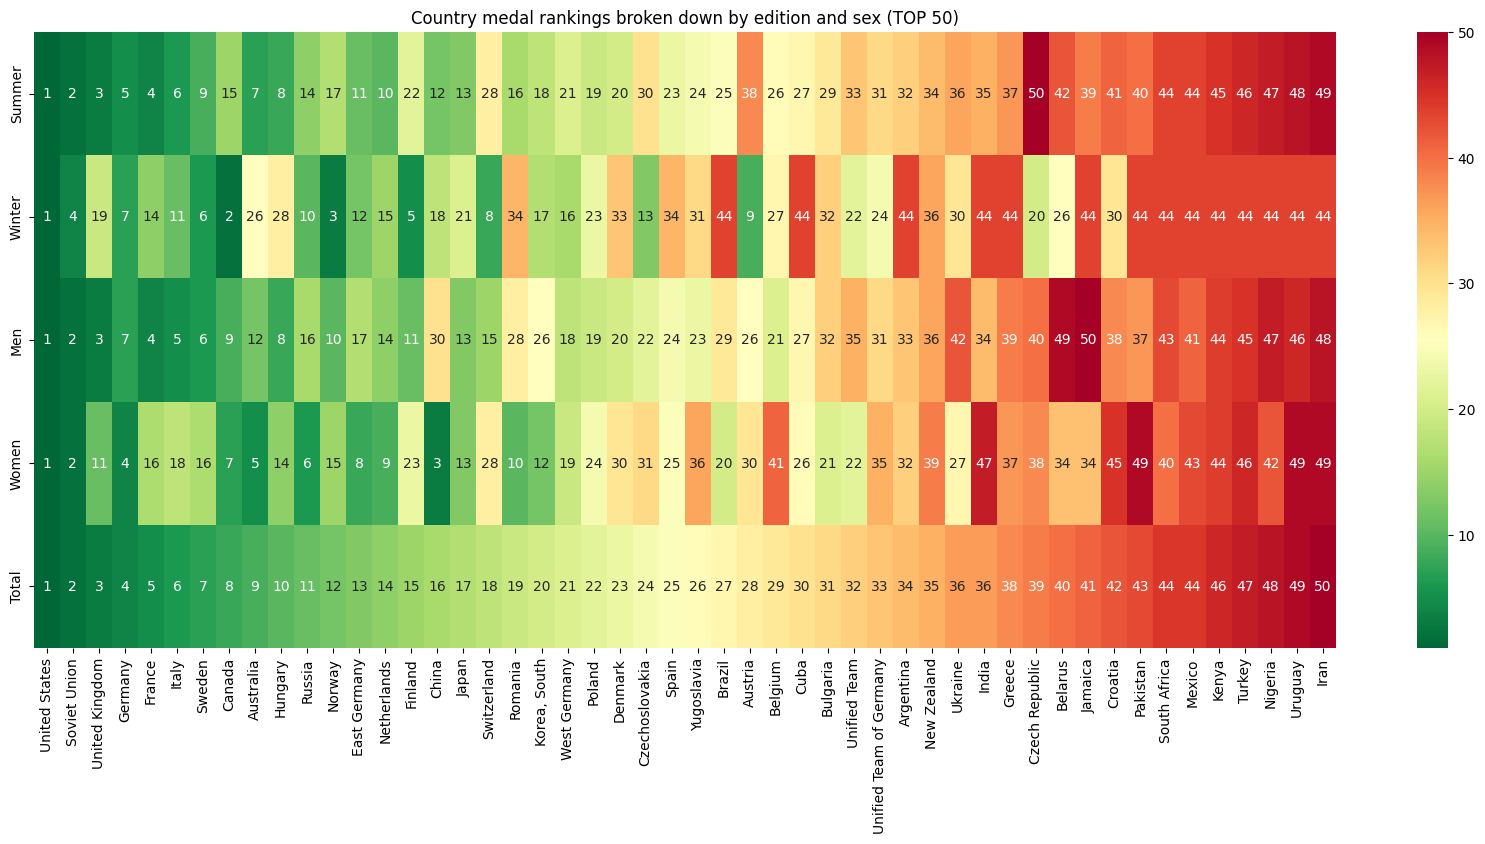

In [547]:
plt.figure(figsize= (21, 8))
sns.heatmap(ranks.T, annot= True, cmap= 'RdYlGn_r')
plt.title("Country medal rankings broken down by edition and sex (TOP 50)")
plt.xlabel(None)
plt.show()

# Question 2 - annotation

Are there counteries that are :
1. __equally successful__ in Summer and Winter Games
2. more successful in __Summer Games__
3. more successful in __Winter Games__

`Equally` succesful

In [483]:
ranks.iloc[np.where(ranks.Summer == ranks.Winter)].index

Index(['United States', 'South Africa', 'Mexico'], dtype='object', name='Country')

Better at `winter`

In [485]:
ranks.iloc[np.where(ranks.Summer > ranks.Winter)].sort_values(by = "Winter")

,Summer,Winter,Men,Women,Total
Country,,,,,
Canada,15.0,2.0,9.0,7.0,8.0
Norway,17.0,3.0,10.0,15.0,12.0
Finland,22.0,5.0,11.0,23.0,15.0
Sweden,9.0,6.0,6.0,16.5,7.0
Switzerland,28.0,8.0,15.0,28.0,18.0
Austria,38.0,9.0,25.5,29.5,28.0
Russia,14.0,10.0,16.0,6.0,11.0
Czechoslovakia,30.0,13.0,22.0,31.0,24.0
West Germany,21.0,16.0,18.0,19.0,21.0


Better at `summer`

In [486]:
ranks.iloc[np.where(ranks.Summer < ranks.Winter)].sort_values(by = "Summer")

,Summer,Winter,Men,Women,Total
Country,,,,,
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
France,4.0,14.0,4.0,16.5,5.0
Germany,5.0,7.0,7.0,4.0,4.0
Italy,6.0,11.0,5.0,18.0,6.0
Australia,7.0,25.5,12.0,5.0,9.0
Hungary,8.0,28.0,8.0,14.0,10.0
Netherlands,10.0,15.0,14.0,9.0,14.0
East Germany,11.0,12.0,17.0,8.0,13.0


In [487]:
summer_vs_winter_diff = ranks.Summer.sub(ranks.Winter)
summer_vs_winter_diff.sort_values(inplace= True)

In [488]:
summer_vs_winter_diff = summer_vs_winter_diff.to_frame(name = "Rank_diff")

In [489]:
plt.rcdefaults()

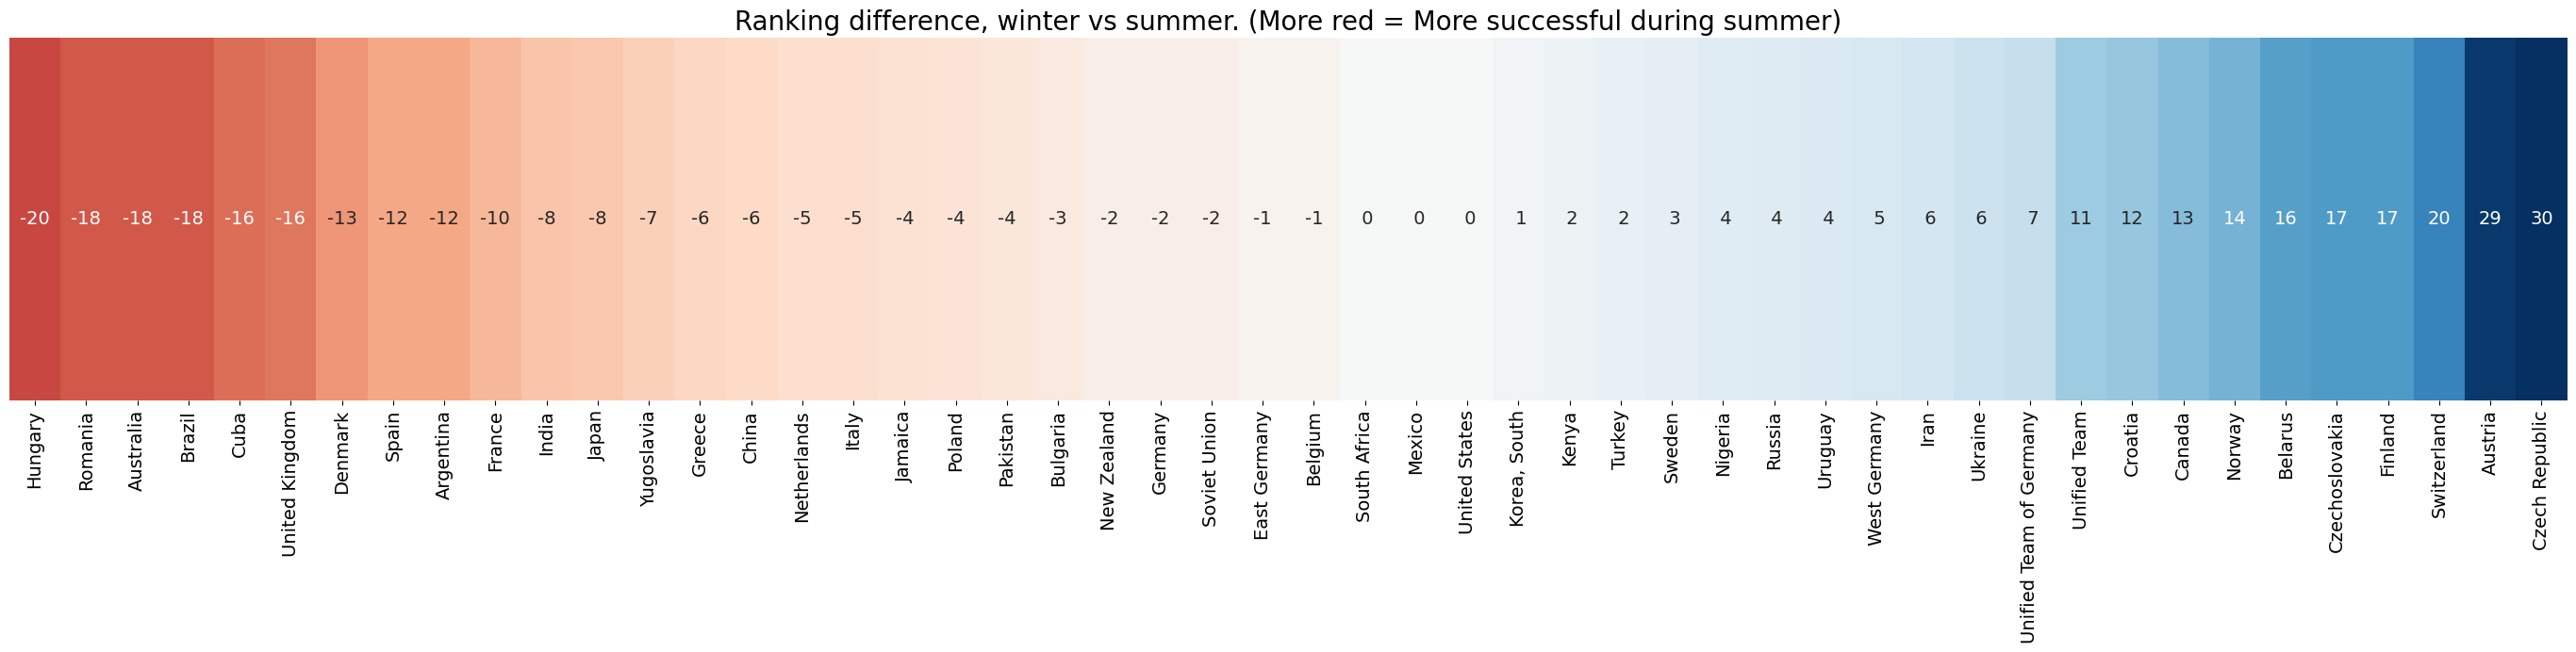

In [546]:
plt.figure(figsize= (35, 5))
ax = sns.heatmap(summer_vs_winter_diff.T, cmap= "RdBu", annot= True, annot_kws= {"size": 14}, center = 0, fmt="2.0f", cbar= False)
plt.title("Ranking difference, winter vs summer. (More red = More successful during summer)", fontsize = 20)
plt.xticks(fontsize=14)

# Hide the y-label (ylabel)
ax.set_yticks([])
ax.set_yticklabels([])

plt.xlabel(None)
plt.show()

# Question 4
* Men vs. Women

Are there countries where:
1. Men and Women are __equally successful__
2. __Men__ are more successful
3. __Women__ are more successful

Men and Women are `equally` successful

In [501]:
ranks.iloc[np.where(ranks.Men == ranks.Women)]

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
Japan,13.0,21.0,13.0,13.0,17.0
Kenya,45.0,43.5,44.0,44.0,46.0


`Men` are more successful

In [493]:
ranks.iloc[np.where(ranks.Men < ranks.Women)]

,Summer,Winter,Men,Women,Total
Country,,,,,
United Kingdom,3.0,19.0,3.0,11.0,3.0
France,4.0,14.0,4.0,16.5,5.0
Italy,6.0,11.0,5.0,18.0,6.0
Sweden,9.0,6.0,6.0,16.5,7.0
Hungary,8.0,28.0,8.0,14.0,10.0
Norway,17.0,3.0,10.0,15.0,12.0
Finland,22.0,5.0,11.0,23.0,15.0
Switzerland,28.0,8.0,15.0,28.0,18.0
West Germany,21.0,16.0,18.0,19.0,21.0


`Women` are more successful

In [492]:
ranks.iloc[np.where(ranks.Men > ranks.Women)]

,Summer,Winter,Men,Women,Total
Country,,,,,
Germany,5.0,7.0,7.0,4.0,4.0
Canada,15.0,2.0,9.0,7.0,8.0
Australia,7.0,25.5,12.0,5.0,9.0
Russia,14.0,10.0,16.0,6.0,11.0
East Germany,11.0,12.0,17.0,8.0,13.0
Netherlands,10.0,15.0,14.0,9.0,14.0
China,12.0,18.0,30.0,3.0,16.0
Romania,16.0,34.5,28.0,10.0,19.0
"Korea, South",18.0,17.0,25.5,12.0,20.0


In [495]:
man_vs_woman_diff = ranks.Men.sub(ranks.Women).sort_values()

In [496]:
man_vs_woman_diff = man_vs_woman_diff.to_frame(name= "rank_diff") # minus value mean MEN are more succesfull

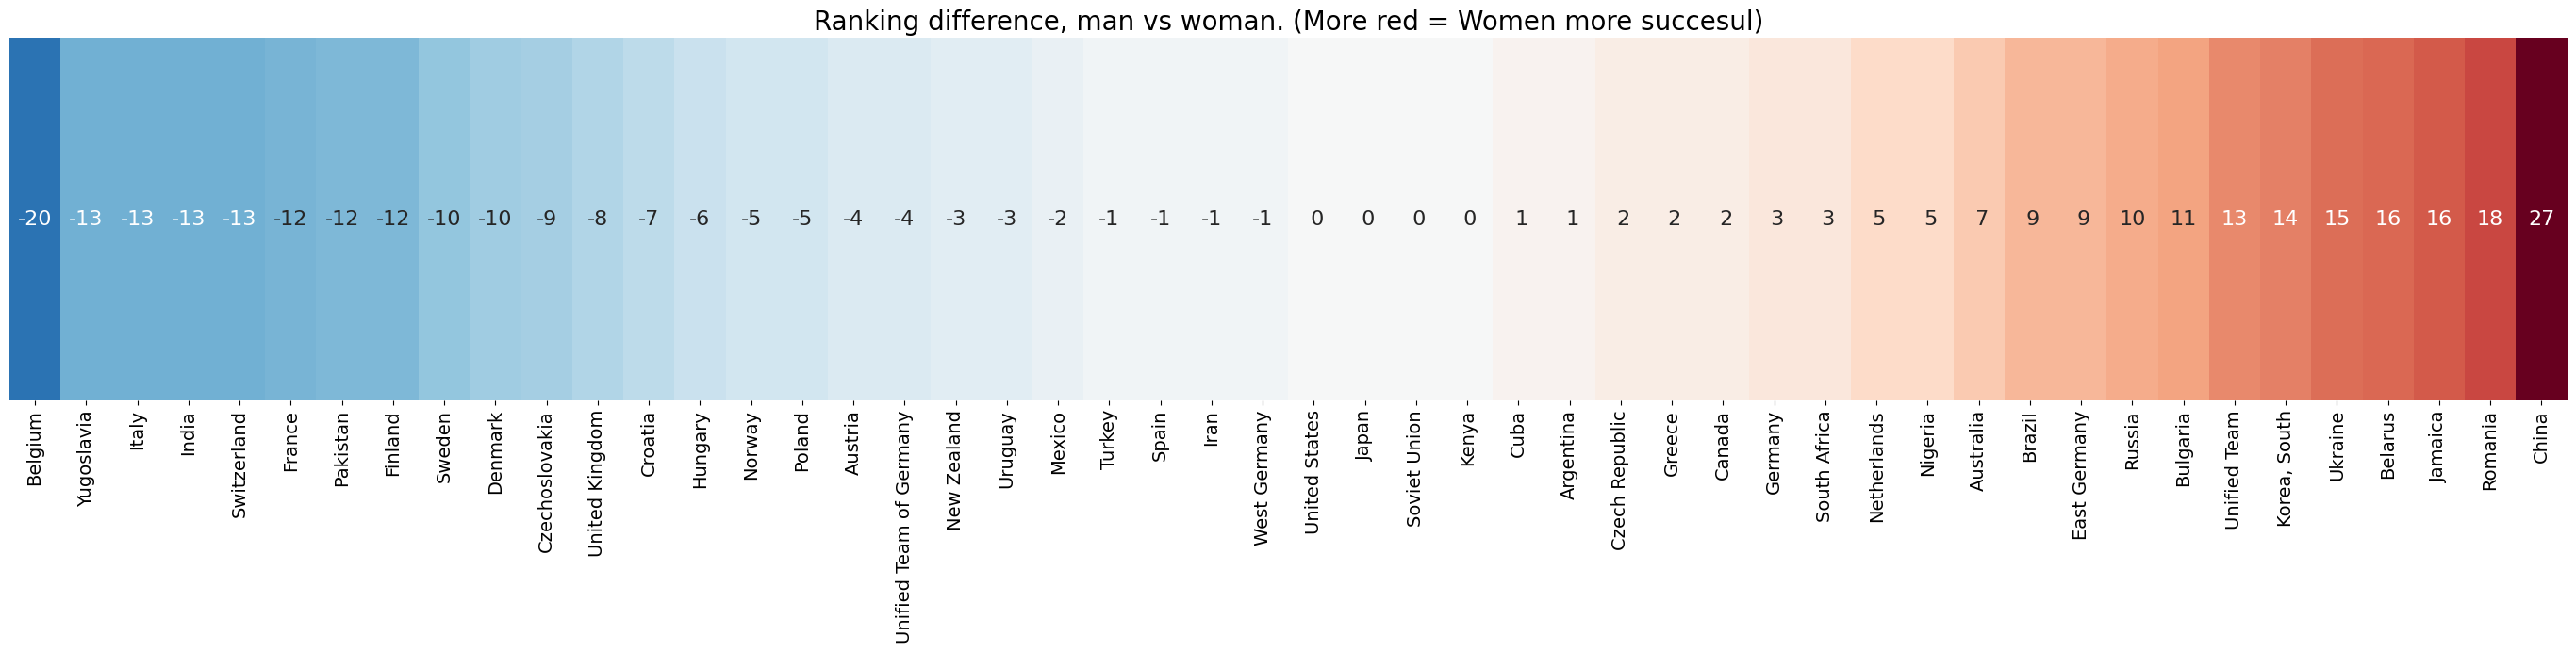

In [544]:
plt.figure(figsize= (35, 5))
ax = sns.heatmap(man_vs_woman_diff.T, cmap= "RdBu_r", annot= True, annot_kws={'size': 16}, center = 0, fmt="2.0f", cbar= False)
plt.title("Ranking difference, man vs woman. (More red = Women more succesul)", fontsize = 20)
plt.xticks(fontsize=14)
plt.xlabel(None)

# Hide the y-label (ylabel)
ax.set_yticks([])
ax.set_yticklabels([])

plt.show()

# Extras
* #### Do Traditions matter?

 __Heatmap__ that shows the __Ranks__ of Top 50 Countries __by Sports__.

In [107]:
olympic.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter,United Kingdom
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter,United States
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter,Canada
36933,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter,Czech Republic


In [108]:
sports_by_country = pd.crosstab(olympic.Country, olympic.Sport, margins= True, margins_name= "Total").sort_values(by = "Total", ascending= False)

In [109]:
sports_by_country.drop("Total", inplace= True)
sports_by_country.drop(columns= "Total", inplace= True)

In [110]:
sports_by_country = sports_by_country.rank(ascending= False)

In [111]:
sports = olympic.Sport.value_counts().index # CORE olympic sports in order from the most popular

In [112]:
sports_by_country = sports_by_country[sports]
sports_by_country.head()

Sport,Aquatics,Athletics,Rowing,Gymnastics,Skiing,Fencing,Ice Hockey,Football,Hockey,Skating,...,Lacrosse,Golf,Triathlon,Cricket,Rackets,Croquet,Water Motorsports,Basque Pelota,Roque,Jeu de paume
Country,,,,,,,,,,,,,,,,,,,,,
United States,1.0,1.0,1.0,2.0,8.0,7.0,2.0,1.0,12.0,1.0,...,3.0,1.0,9.5,74.0,73.5,73.5,74.0,74.0,1.0,2.0
Soviet Union,4.0,3.0,7.0,1.0,5.0,4.0,5.0,3.0,11.0,4.0,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
United Kingdom,10.5,2.0,2.0,19.0,34.5,15.0,10.0,20.0,5.0,16.0,...,2.0,2.0,5.0,1.5,1.0,73.5,1.0,74.0,73.5,1.0
Germany,5.0,7.0,5.0,16.0,6.0,6.0,13.0,7.5,4.0,9.0,...,74.5,74.5,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
France,14.0,8.0,11.0,17.0,10.0,2.0,79.5,23.0,83.0,17.0,...,74.5,74.5,79.0,1.5,73.5,1.0,2.0,1.5,73.5,74.0


In [113]:
sports_by_country = sports_by_country.apply(lambda x: x.astype("category"))

In [114]:
sports_by_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, United States to Senegal
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Aquatics           145 non-null    category
 1   Athletics          145 non-null    category
 2   Rowing             145 non-null    category
 3   Gymnastics         145 non-null    category
 4   Skiing             145 non-null    category
 5   Fencing            145 non-null    category
 6   Ice Hockey         145 non-null    category
 7   Football           145 non-null    category
 8   Hockey             145 non-null    category
 9   Skating            145 non-null    category
 10  Wrestling          145 non-null    category
 11  Shooting           145 non-null    category
 12  Sailing            145 non-null    category
 13  Cycling            145 non-null    category
 14  Basketball         145 non-null    category
 15  Canoe / Kayak      145 non-null    category
 1

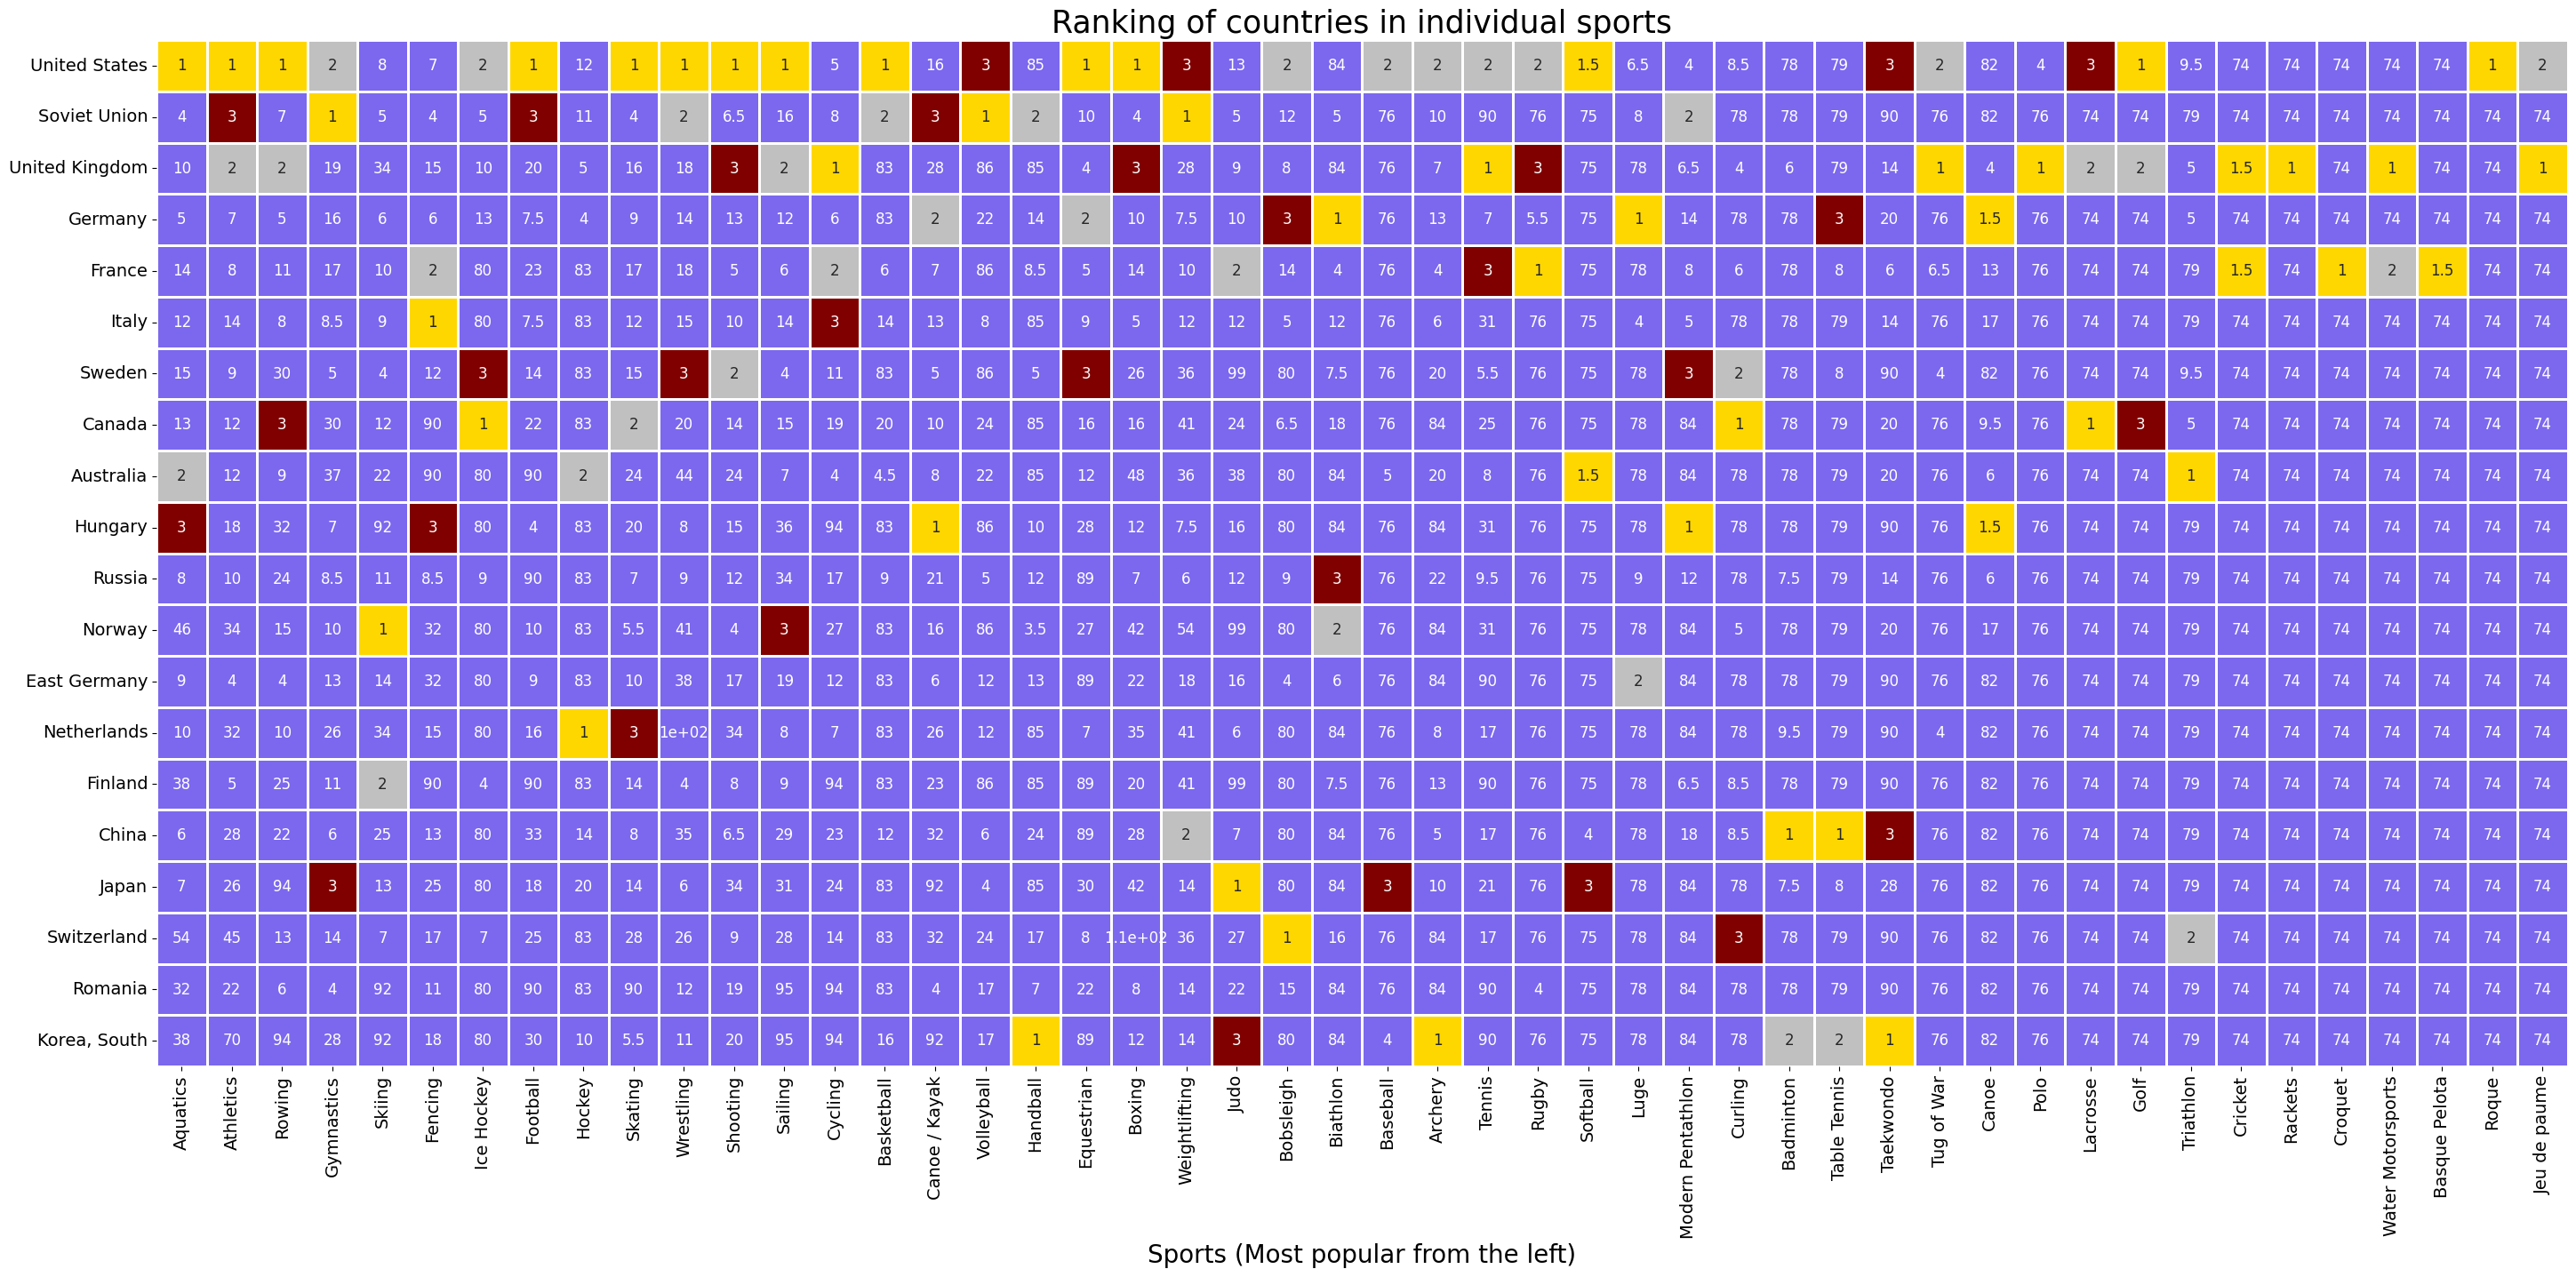

In [538]:
from matplotlib.colors import LinearSegmentedColormap

myColors = ((255/255,215/255,0/255, 1), (192/255 , 192/255 , 192/255 , 1.0), (128/255, 0.0, 0.0, 1.0), (123/255, 104/255, 238/255, 1))

cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

plt.figure(figsize= (35,15))
sns.heatmap(sports_by_country.iloc[0:20, :], cmap= cmap, vmin = 1, vmax = 4, linewidths = 1, annot= True, annot_kws={"size":12}, cbar= False)
plt.title("Ranking of countries in individual sports", size = 25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Sports (Most popular from the left)", size = 20)
plt.ylabel(None)
plt.show()